### Testing 3D data type 



### First test a steady case - 5 deg AoA

In [1]:
include("../src/UNSflow.jl")
    

/Users/kiran/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


UNSflow

In [2]:
using UNSflow

### Run a 2D case first

In [3]:
alphadef = EldUpDef(45.*pi/180, pi/8, 0.8)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kinemdef = KinemDef(alphadef, hdef, udef) 
pvt = 0.0 #leading edge
lespcrit = [0.11;]
surf = TwoDSurf("FlatPlate", pvt, kinemdef,lespcrit)

curfield = TwoDFlowField()
dtstar = 0.0075
nsteps = Int(round(2.5/0.0075))
mat2d, surf2d, curfield2d = ldvm(surf, curfield, nsteps, dtstar)

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in slice(::Array{Float64,2}, ::Vararg{Any,N}) at ./deprecated.jl:30
 in sumabs2j at /Users/kiran/.julia/v0.5/NLsolve/src/utils.jl:1 [inlined]
 in trust_region_(::NLsolve.DifferentiableMultivariateFunction, ::Array{Float64,1}, ::Float64, ::Float64, ::Int64, ::Bool, ::Bool, ::Bool, ::Float64, ::Bool) at /Users/kiran/.julia/v0.5/NLsolve/src/trust_region.jl:105
 in #nlsolve#17(::Symbol, ::Float64, ::Float64, ::Int64, ::Bool, ::Bool, ::Bool, ::Function, ::Float64, ::Bool, ::NLsolve.#nlsolve, ::NLsolve.DifferentiableMultivariateFunction, ::Array{Float64,1}) at /Users/kiran/.julia/v0.5/NLsolve/src/nlsolve_func_defs.jl:24
 in ldvm(::UNSflow.TwoDSurf, ::UNSflow.TwoDFlowField, ::Int64, ::Float64, ::UNSflow.DelVortDef, ::Array{Float64,2}, ::Float64) at /Users/kiran/Documents/Projects/UNSflow/src/solvers.jl:399
 in ldvm(::UNSflow.TwoDSurf, ::UNSflow.TwoDFlowField, ::Int64, ::Float64) at /Users/kiran/Documents/Projects/UNSflow/src/solvers.jl:36

(
[0.0075 7.36966e-13 … 1.60487e-21 -1.2598e-9; 0.015 8.86735e-13 … 3.63266e-22 -2.58442e-10; … ; 2.49 0.785398 … 2.88844 -1.45435; 2.4975 0.785398 … 2.88469 -1.45823],

UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.EldUpDef(0.7853981633974483,0.39269908169872414,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.7853980148910488,0.0,3.664239987121668e-6,0.0,1.0,0.0),[-3.4975,-3.49713,-3.49604,-3.49421,-3.49165,-3.48838,-3

In [4]:
cref = 1.
bref = 10.
sref = 10.

patch1 = patch(0., -5., 0., 0., "FlatPlate", 1., 0., 0.11, 7)
patch2 = patch(0., 0., 0., 0., "FlatPlate", 1., 0., 0.11, 7)
patch3 = patch(0., 5., 0., 0., "FlatPlate", 1., 0., 0.11, 5)
patchdata = [patch1; patch2; patch3]

alphadef = EldUpDef(45.*pi/180, pi/8, 0.8)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kin = KinemDef3D(alphadef, hdef, udef)






UNSflow.KinemDef3D(UNSflow.EldUpDef(0.7853981633974483,0.39269908169872414,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0),"Constant",0,[0.0])

In [5]:
surf = ThreeDSurf(cref, bref, sref, patchdata, kin, 1., 70, 35, 15)
field = ThreeDFlowField()
dtstar = 0.0075
nsteps =round(Int,2.5/dtstar) + 1
mat3d, surf3d, field3d = QSLLT_ldvm(surf, field, nsteps, dtstar)



(
[0.0075 2.06897e-9 1.48705e-21 -1.17504e-9; 0.015 4.61071e-10 3.52861e-22 -2.46146e-10; … ; 2.4975 4.43546 3.94959 2.39389; 2.505 5.62979 5.13738 8.98189],

UNSflow.TwoDSurf[UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.EldUpDef(0.785398,0.392699,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.785398,0.0,3.0452e-6,0.0,1.0,0.0),[-3.505,-3.50463,-3.50354,-3.50171,-3.49915,-3.49588,-3.49189,-3.48719,-3.4818,-3.47573  …  

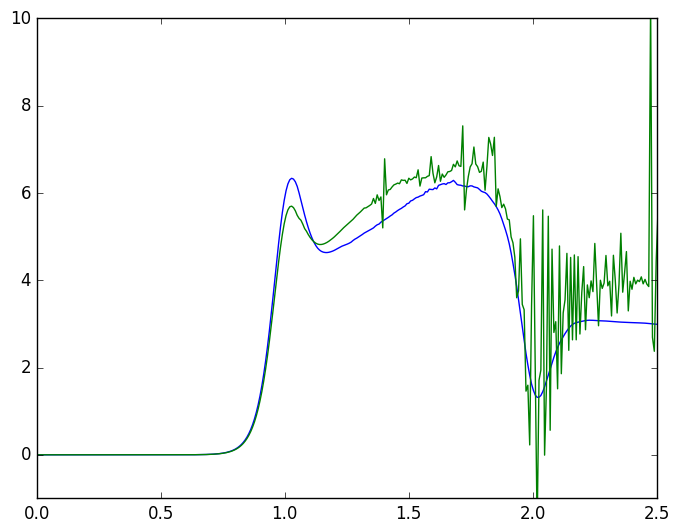

4-element Array{Float64,1}:
  0.0
  2.5
 -1.0
 10.0

In [6]:
plot(mat2d[:,1],mat2d[:,6])
plot(mat3d[:,1], mat3d[:,2])
axis([0, 2.5, -1, 10])

In [7]:
field3d

15-element Array{UNSflow.TwoDFlowField,1}:
 UNSflow.TwoDFlowField(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),[0.0],[0.0],UNSflow.TwoDVort[UNSflow.TwoDVort(-0.01358,0.0595566,-4.92723e-12,0.02,-0.0108494,0.0470215),UNSflow.TwoDVort(-0.021267,0.0601235,-6.76129e-13,0.02,-0.011065,0.0474253),UNSflow.TwoDVort(-0.0289586,0.0606989,-1.27314e-12,0.02,-0.0112859,0.0478342),UNSflow.TwoDVort(-0.0366549,0.0612829,-1.63662e-12,0.02,-0.0115123,0.0482483),UNSflow.TwoDVort(-0.0443561,0.0618757,-2.05724e-12,0.02,-0.0117443,0.0486676),UNSflow.TwoDVort(-0.0520623,0.0624774,-2.37509e-12,0.02,-0.0119821,0.0490923),UNSflow.TwoDVort(-0.0597737,0.0630884,-2.89813e-12,0.02,-0.0122259,0.0495224),UNSflow.TwoDVort(-0.0674904,0.0637087,-3.35709e-12,0.02,-0.0124759,0.049958),UNSflow.TwoDVort(-0.0752127,0.0643385,-4.10298e-12,0.02,-0.0127323,0.0503991),UNSflow.TwoDVort(-0.0829406,0.0649781,-4.93587e-12,0.02,-0.0129952,0.050846)  …  UNSflow.TwoDVort(-2.7296,-0.70301,0.00106785,0.02,-0.0347867,0.0617879),UNSflow.Two

In [8]:
field3d[5].lev

187-element Array{UNSflow.TwoDVort,1}:
 UNSflow.TwoDVort(-3.11878,-0.436221,0.000327974,0.02,-0.725448,-0.403012)
 UNSflow.TwoDVort(-3.17241,-0.383222,0.00803688,0.02,-0.773104,-0.341855) 
 UNSflow.TwoDVort(-3.20277,0.221386,0.00995988,0.02,1.40629,0.263969)     
 UNSflow.TwoDVort(-2.95103,-0.265768,0.0127843,0.02,-2.32502,-0.822439)   
 UNSflow.TwoDVort(-2.93127,-0.12949,0.0152353,0.02,-1.16678,-1.2472)      
 UNSflow.TwoDVort(-2.96775,-0.07677,0.017413,0.02,-0.903922,-1.13392)     
 UNSflow.TwoDVort(-3.05563,-0.0225807,0.0193558,0.02,-0.593443,-0.341451) 
 UNSflow.TwoDVort(-2.96312,-0.0265767,0.0210757,0.02,-0.35612,-1.07133)   
 UNSflow.TwoDVort(-2.92362,-0.227852,0.0225884,0.02,-1.9252,-1.24708)     
 UNSflow.TwoDVort(-3.05672,-0.0517143,0.0239088,0.02,-0.950438,-0.344519) 
 UNSflow.TwoDVort(-3.1289,-0.0220858,0.0250492,0.02,-0.812339,0.13894)    
 UNSflow.TwoDVort(-2.97052,0.0146543,0.0260276,0.02,-0.0817755,-1.07812)  
 UNSflow.TwoDVort(-2.97503,-0.0570133,0.0268647,0.02,-0.67309

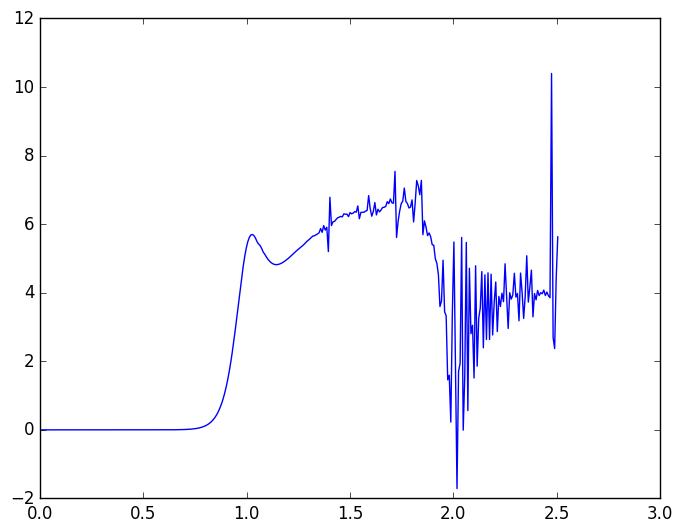

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x328482350>

In [9]:
plot(mat3d[:,1], mat3d[:,2])

In [10]:
surf3d[3].levflag

1-element Array{Int8,1}:
 1